In [65]:
import numpy as np
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from scipy.spatial import distance
from collections import defaultdict
from mltools.dataManager import DataManager
import tqdm
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<img src='images/knn.png'>

In [21]:
class KNN():
    
    def __init__(self, k=3, weighted=True):
        self.k = k
        self.weighted = weighted
    
    
    def _distance(self, point, neighbors):
        try:
            eps = 1e-10
            return np.sqrt(np.sum((neighbors - point)**2, axis=1)) + eps
        except:
            return np.sqrt(np.sum((neighbors - point)**2)) + eps

 
    def fit(self, x_train, y_train):
        self.data = x_train
        self.labels = y_train
        
        
    def predict(self, x_test, weighted=True):
        data, labels = self.data, self.labels
        n = x_test.shape[0]
        closest = np.zeros(n)
        
        for i in range(n):
            dist = self._distance(x_test[i,:], data)
            indices = np.argsort(dist, axis=0)
            
            neighbors = defaultdict(lambda:0)
            for j in indices[:self.k]:
                if self.weighted:
                    weight = 1 / self._distance(x_test[i,:], data[j])**2
                else:
                    weight = 1
                neighbors[labels[j]] += weight
            
            max_prob = 0
            max_key = None
            for key, val in neighbors.iteritems():
                if val > max_prob:
                    max_prob = val
                    max_key = key
                                
            closest[i] = max_key
                                
        return closest        

In [4]:
class KNNRegression():
    
    def __init__(self, k=3, weighted=True):
        self.k = k
        self.weighted = weighted
    
    
    def _distance(self, point, neighbors):
        try:
            eps = 1e-10
            return np.sqrt(np.sum((neighbors - point)**2, axis=1)) + eps
        except:
            return np.sqrt(np.sum((neighbors - point)**2)) + eps

 
    def fit(self, x_train, y_train):
        self.data = x_train
        self.labels = y_train
        
        
    def predict(self, x_test, weighted=True):
        data, labels = self.data, self.labels
        n = x_test.shape[0]
        prediction = np.zeros(n)
        
        for i in range(n):
            dist = self._distance(x_test[i,:], data)
            indices = np.argsort(dist, axis=0)
            
            denominator = 0
            numerator = 0
            for j in indices[:self.k]:
                if self.weighted:
                    weight = 1 / self._distance(x_test[i,:], data[j])**2
                else:
                    weight = 1
                neighbors[labels[j]] += weight
                
                numerator += weight * labels[j]
                denominator += weight
                
            prediction[i] = numerator / denominator
                                   
        return prediction        

#### Load the Data

In [5]:
data = DataManager('datasets/mt_train.arff')
data.normalize()
x_train, x_test, y_train, y_test = data.test_train_split()

#### Check Against Sklearn

In [6]:
knn = KNN(k=3, weighted=False)
knn.fit(x_train, y_train)
accuracy_score(knn.predict(x_test), y_test)

0.81667341157426143

In [7]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.81667341157426143

In [191]:
data = DataManager('datasets/housing-train.arff')
data.min_max_normalize()
x_train, x_test, y_train, y_test = data.test_train_split()

In [192]:
knn = KNNRegression(k=3, weighted=False)
knn.fit(x_train, y_train)
knn.predict(x_test)

array([ 24.4       ,  22.5       ,  21.8       ,  20.23333333,
        21.16666667,  36.9       ,  22.3       ,  33.06666667,
        12.2       ,  22.33333333,  38.53333333,  23.7       ,
        22.93333333,  27.33333333,  19.96666667,  21.23333333,
        22.        ,  24.06666667,   9.23333333,  11.46666667,
        24.16666667,  22.13333333,  19.        ,  21.4       ,
        29.66666667,  19.03333333,  20.83333333,  33.8       ,
        20.8       ,  23.16666667,  10.46666667,  14.53333333,
        20.43333333,  11.6       ,  18.76666667,  22.        ,
        16.3       ,  19.96666667,  22.86666667,  31.73333333,
        23.06666667,  15.6       ,  23.16666667,  33.63333333,
        13.96666667,  21.03333333,  20.7       ,  30.9       ,
        18.83333333,  26.1       ,  20.83333333,  30.26666667,
        16.26666667,  32.56666667,  20.1       ,  11.13333333,
        21.06666667,  23.03333333,  19.33333333,  39.13333333,
        14.56666667,  26.36666667,  18.36666667,  12.7 

In [193]:
knn = KNeighborsRegressor(n_neighbors=3, weights='uniform')
knn.fit(x_train, y_train)
knn.predict(x_test)

array([ 24.4       ,  22.5       ,  21.8       ,  20.23333333,
        21.16666667,  36.9       ,  22.3       ,  33.06666667,
        12.2       ,  22.33333333,  38.53333333,  23.7       ,
        22.93333333,  27.33333333,  19.96666667,  21.23333333,
        22.        ,  24.06666667,   9.23333333,  11.46666667,
        24.16666667,  22.13333333,  19.        ,  21.4       ,
        29.66666667,  19.03333333,  20.83333333,  33.8       ,
        20.8       ,  23.16666667,  10.46666667,  14.53333333,
        20.43333333,  11.6       ,  18.76666667,  22.        ,
        16.3       ,  19.96666667,  22.86666667,  31.73333333,
        23.06666667,  15.6       ,  23.16666667,  33.63333333,
        13.96666667,  21.03333333,  20.7       ,  30.9       ,
        18.83333333,  26.1       ,  20.83333333,  30.26666667,
        16.26666667,  32.56666667,  20.1       ,  11.13333333,
        21.06666667,  23.03333333,  19.33333333,  39.13333333,
        14.56666667,  26.36666667,  18.36666667,  12.7 

## Problem 2

### No Normalization

In [205]:
train = DataManager('datasets/mt_train.arff')
x_train, y_train = train.data, train.labels
test = DataManager('datasets/mt_test.arff')
x_test, y_test = test.data, test.labels

In [206]:
knn = KNN(k=3, weighted=False)
knn.fit(x_train, y_train)
accuracy_score(knn.predict(x_test), y_test)

0.80828082808280832

### With normalization

In [203]:
train = DataManager('datasets/mt_train.arff')
train.min_max_normalize()
x_train, y_train = train.data, train.labels
test = DataManager('datasets/mt_test.arff')
test.min_max_normalize()
x_test, y_test = test.data, test.labels

In [204]:
knn = KNN(k=3, weighted=False)
knn.fit(x_train, y_train)
accuracy_score(knn.predict(x_test), y_test)

0.81578157815781582

### Other normalization

In [258]:
train = DataManager('datasets/mt_train.arff')
train.normalize()
x_train, y_train = train.data, train.labels
test = DataManager('datasets/mt_test.arff')
test.normalize()
x_test, y_test = test.data, test.labels

In [250]:
knn = KNN(k=3, weighted=False)
knn.fit(x_train, y_train)
accuracy_score(knn.predict(x_test), y_test)

0.83648364836483646

In [251]:
knn_acc = []
for k in range(1,16,2):
    knn = KNN(k=k, weighted=True)
    knn.fit(x_train, y_train)
    knn_acc.append(accuracy_score(knn.predict(x_test), y_test))

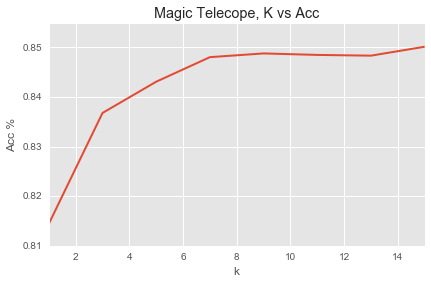

In [252]:
plt.plot(range(1,16,2), knn_acc)
plt.xlabel('k')
plt.ylabel('Acc %')
plt.title('Magic Telecope, K vs Acc')
plt.xlim(1,15)
plt.savefig('mt.svg', format='svg', dpi=1200)

## Problem 3

In [246]:
train = DataManager('datasets/housing-train.arff')
train.normalize()
x_train, y_train = train.data, train.labels
test = DataManager('datasets/housing-test.arff')
test.normalize()
x_test, y_test = test.data, test.labels

In [247]:
knn_acc = []
for k in range(1,16,2):
    knn = KNNRegression(k=k, weighted=True)
    knn.fit(x_train, y_train)
    knn_acc.append(mean_squared_error(knn.predict(x_test), y_test))

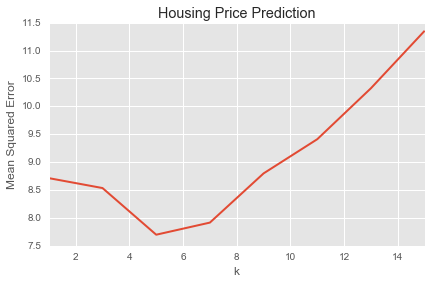

In [248]:
plt.plot(range(1,16,2), knn_acc)
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('Housing Price Prediction')
plt.xlim(1,15)
plt.savefig('housing.svg', format='svg', dpi=1200)

## Problem 5

In [253]:
data = DataManager('datasets/credit-a.arff')
data.normalize()
x_train, x_test, y_train, y_test = data.test_train_split()

In [256]:
print data

@RELATION credit-rating@ATTRIBUTE A1
 {b, a}
@ATTRIBUTE A2
 CONTINUOUS
@ATTRIBUTE A3
 CONTINUOUS
@ATTRIBUTE A4
 {u, y, l, t}
@ATTRIBUTE A5
 {g, p, gg}
@ATTRIBUTE A6
 {c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff}
@ATTRIBUTE A7
 {v, h, bb, j, n, z, dd, ff, o}
@ATTRIBUTE A8
 CONTINUOUS
@ATTRIBUTE A9
 {t, f}
@ATTRIBUTE A10
 {t, f}
@ATTRIBUTE A11
 CONTINUOUS
@ATTRIBUTE A12
 {t, f}
@ATTRIBUTE A13
 {g, p, s}
@ATTRIBUTE A14
 CONTINUOUS
@ATTRIBUTE A15
 CONTINUOUS
@ATTRIBUTE class
 {+, -}
@DATA
[[   0.      67.75     5.5   ...,    0.       0.       0.   ]
 [   0.      20.42     1.085 ...,    0.     108.       7.   ]
 [   0.      36.5      4.25  ...,    0.     454.      50.   ]
 ..., 
 [   0.      28.25     5.125 ...,    0.     420.       7.   ]
 [   0.      21.42     0.75  ...,    0.     132.       2.   ]
 [   0.      19.42     7.25  ...,    0.     100.       1.   ]]


In [8]:
from scipy.spatial import kdtree

In [13]:
x_test[0,:]

array([-0.52029948, -0.4436906 , -0.48310463,  0.03730648, -0.02028129,
       -0.54479627,  0.18929675, -0.45301518,  2.06963304,  0.56305572])

In [9]:
kd = kdtree.KDTree(x_train)

In [18]:
kd.query(x_test[0,:], k=8)

(array([ 0.37454211,  0.39884559,  0.79220495,  0.80642474,  0.81612462,
         0.85238838,  0.86741427,  0.89844384]),
 array([2355, 4044, 4688, 6138,  322, 1002, 1346,   83]))

In [269]:
x_train[0,:]

array([-0.72274438, -0.39772184, -0.8231228 ,  0.64474212,  0.32735342,
       -0.16236592, -0.38955674,  0.61681988, -0.94493536, -0.69080543])

In [17]:
kd.data.shape

(9883, 10)

In [25]:
class KNN_kd():
    
    def __init__(self, k=3, weighted=True):
        self.k = k
        self.weighted = weighted
    
    
    def _distance(self, point, neighbors):
        try:
            eps = 1e-10
            return np.sqrt(np.sum((neighbors - point)**2, axis=1)) + eps
        except:
            return np.sqrt(np.sum((neighbors - point)**2)) + eps

 
    def fit(self, x_train, y_train):
        self.kd_tree = kdtree.KDTree(x_train)
        self.labels = y_train
        
        
    def predict(self, x_test, weighted=True):
        kd_tree, labels = self.kd_tree, self.labels
        n = x_test.shape[0]
        closest = np.zeros(n)
        
        for i in range(n):
            dist, indx_list = kd_tree.query(x_test[i,:], self.k)
            neighbors = defaultdict(lambda:0)
            for j in indx_list:
                if self.weighted:
                    weight = 1 / self._distance(x_test[i,:], data[j])**2
                else:
                    weight = 1
                neighbors[labels[j]] += weight
            
            max_prob = 0
            max_key = None
            for key, val in neighbors.iteritems():
                if val > max_prob:
                    max_prob = val
                    max_key = key
                                
            closest[i] = max_key
                                
        return closest        

In [59]:
import time

In [36]:
def _distance(point, neighbors):
    try:
        eps = 1e-10
        return np.sqrt(np.sum((neighbors - point)**2, axis=1)) + eps
    except:
        return np.sqrt(np.sum((neighbors - point)**2)) + eps

In [56]:
data = np.random.random((1000,5)) * 100
k = 5
kd_tree = kdtree.KDTree(data)
point = np.random.random(5) * 100

In [124]:
regular_times = []
tree_times = []
time_diff = []

for x in tqdm.tqdm([10**i for i in range(1,8)]):
    data = np.random.random((x,5)) * 100
    k = 5
    kd_tree = kdtree.KDTree(data)
    point = np.random.random(5) * 100

    start = time.time()
    dist = _distance(point, data)
    indices = np.argsort(dist, axis=0)
    indices = indices[:k]
    end = time.time()
    reg_time = end - start

    start = time.time()
    dist, indx_list = kd_tree.query(point, k)
    end = time.time()
    tree_time = end - start
    regular_times.append(reg_time)
    tree_times.append(tree_time)
    
    time_diff.append(reg_time - tree_time)

100%|██████████| 7/7 [01:00<00:00, 17.59s/it]


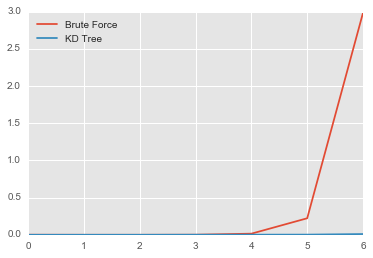

In [125]:
plt.plot(regular_times, label='Brute Force')
plt.plot(tree_times, label='KD Tree')
plt.legend(loc='upper left')

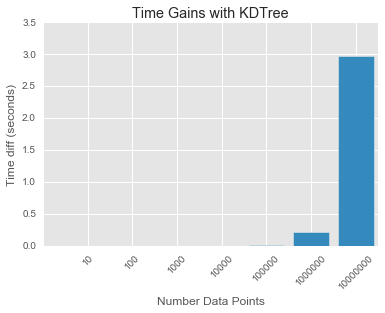

In [126]:
plt.bar(range(1,8), time_diff, align='center')
plt.xticks(range(1,8), [10**i for i in range(1,8)], rotation='45')
plt.xlim(0,7.5)
plt.ylim(0,3.5)
plt.xlabel('Number Data Points')
plt.ylabel('Time diff (seconds)')
plt.title('Time Gains with KDTree')
plt.savefig('depth-vs-time.png', format='png', dpi=1200)

In [115]:
regular_times = []
tree_times = []
time_diff = []

for x in tqdm.tqdm([5*i for i in range(1,10)]):
    data = np.random.random((1000000,x)) * 100
    k = 5
    kd_tree = kdtree.KDTree(data)
    point = np.random.random(x) * 100

    start = time.time()
    dist = _distance(point, data)
    indices = np.argsort(dist, axis=0)
    indices = indices[:k]
    end = time.time()
    reg_time = end - start

    start = time.time()
    dist, indx_list = kd_tree.query(point, k)
    end = time.time()
    tree_time = end - start
    regular_times.append(reg_time)
    tree_times.append(tree_time)
    
    time_diff.append(reg_time - tree_time)

100%|██████████| 9/9 [01:23<00:00, 11.15s/it]


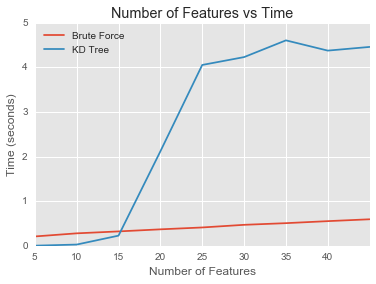

In [122]:
plt.title('Number of Features vs Time')
plt.ylabel('Time (seconds)')
plt.xlabel('Number of Features')
plt.xticks(range(0,8), [5*i for i in range(1,11)])
plt.plot(regular_times, label='Brute Force')
plt.plot(tree_times, label='KD Tree')
plt.legend(loc='upper left')
plt.savefig('features-vs-time.png', format='png', dpi=1200)

In [26]:
train = DataManager('datasets/mt_train.arff')
train.normalize()
x_train, y_train = train.data, train.labels
test = DataManager('datasets/mt_test.arff')
test.normalize()
x_test, y_test = test.data, test.labels

In [23]:
knn = KNN(k=3, weighted=False)
knn.fit(x_train, y_train)
accuracy_score(knn.predict(x_test), y_test)

0.83648364836483646

In [28]:
kd = KNN_kd(k=3, weighted=False)
kd.fit(x_train, y_train)

In [35]:
%time
x = knn.predict(x_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [34]:
%time
x = kd.predict(x_test)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 5.01 µs
